--- Generating Synthetic Sales Data ---
Generated 1000 records.

--- Initial Data Preview ---
        Date     Product  Quantity   Region  Customer_Satisfaction   Price
0 2024-04-12      Tablet         4  Central                      3  296.79
1 2024-12-14      Laptop         4    North                      5  972.57
2 2024-09-27  Smartphone         4    South                      3  619.84
3 2024-04-16      Laptop         4    North                      1  950.14
4 2024-03-12      Laptop         1     West                      5  977.52

--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   1000 non-null   datetime64[ns]
 1   Product                1000 non-null   object        
 2   Quantity               1000 non-null   int64         
 3   Region                 10

/tmp/ipython-input-1-1302752732.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='viridis')
/tmp/ipython-input-1-1302752732.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='plasma')
/tmp/ipython-input-1-1302752732.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_satisfaction_by_product.index, y=avg_satisfaction_by_product.values, palette='coolwarm')


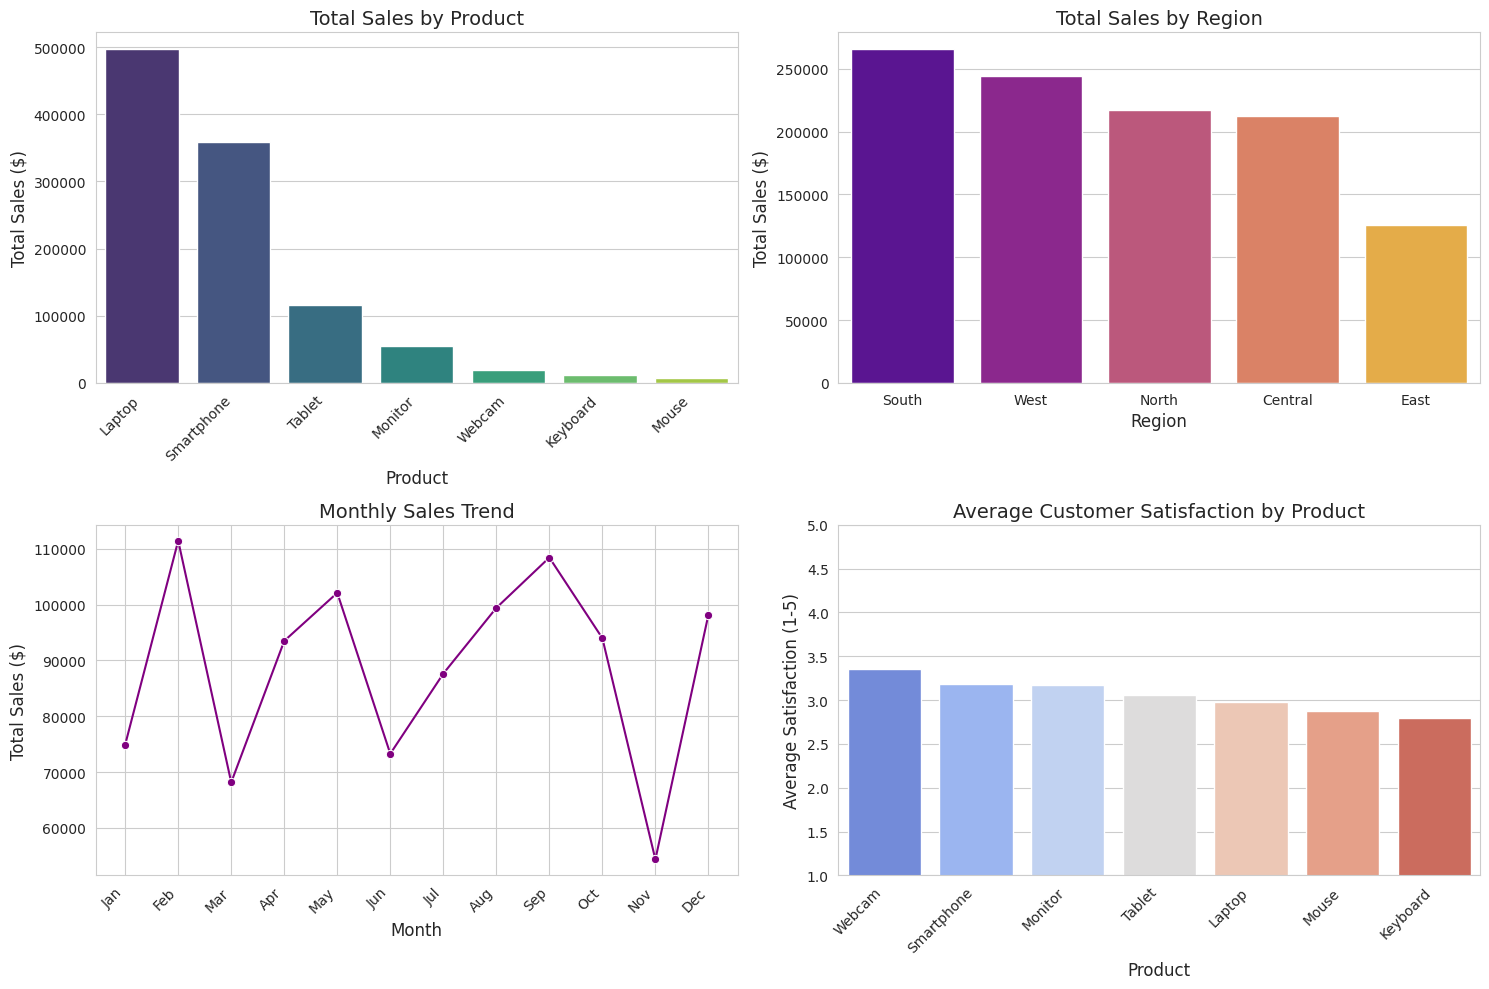


--- Analysis Complete ---
Key Insights:
- Highest sales product: Laptop with $497,352.41
- Region with highest sales: South with $265,700.85
- Product with highest average customer satisfaction: Webcam (3.35)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Generation (Synthetic Data) ---
# For a real project, you would load data from a CSV, Excel, database, etc.
# Example: df = pd.read_csv('your_data.csv')

print("--- Generating Synthetic Sales Data ---")
np.random.seed(42) # for reproducibility

# Number of sales records
num_records = 1000

# Generate dates for the past year
dates = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.random.randint(0, 365, num_records), unit='D')

# Product categories
products = ['Laptop', 'Smartphone', 'Tablet', 'Monitor', 'Keyboard', 'Mouse', 'Webcam']
product_prices = {
    'Laptop': 950.00, 'Smartphone': 600.00, 'Tablet': 300.00,
    'Monitor': 200.00, 'Keyboard': 50.00, 'Mouse': 25.00, 'Webcam': 75.00
}

# Regions
regions = ['North', 'South', 'East', 'West', 'Central']

# Generate data
data = {
    'Date': dates,
    'Product': np.random.choice(products, num_records, p=[0.2, 0.25, 0.15, 0.1, 0.1, 0.1, 0.1]),
    'Quantity': np.random.randint(1, 5, num_records), # Quantity sold per transaction
    'Region': np.random.choice(regions, num_records, p=[0.2, 0.25, 0.15, 0.2, 0.2]),
    'Customer_Satisfaction': np.random.randint(1, 6, num_records) # 1-5 rating
}

# Create DataFrame
df = pd.DataFrame(data)

# Add Price based on product and introduce some variability
df['Price'] = df['Product'].map(product_prices) * (1 + np.random.uniform(-0.1, 0.1, num_records))
df['Price'] = df['Price'].round(2)

print(f"Generated {num_records} records.")
print("\n--- Initial Data Preview ---")
print(df.head())

# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- Data Information ---")
df.info()

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Missing Values Check ---")
print(df.isnull().sum()) # Check for any missing values

# --- 3. Data Cleaning and Feature Engineering ---
# Calculate Total Sales for each transaction
df['Total_Sales'] = df['Quantity'] * df['Price']

# Extract Year and Month for time-based analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%b') # Abbreviated month name

print("\n--- Data after Feature Engineering (first 5 rows) ---")
print(df.head())

# --- 4. Key Metrics and Aggregations ---

print("\n--- Total Sales by Product ---")
sales_by_product = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
print(sales_by_product)

print("\n--- Total Sales by Region ---")
sales_by_region = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False)
print(sales_by_region)

print("\n--- Average Customer Satisfaction by Product ---")
avg_satisfaction_by_product = df.groupby('Product')['Customer_Satisfaction'].mean().sort_values(ascending=False)
print(avg_satisfaction_by_product.round(2))

print("\n--- Monthly Sales Trend ---")
monthly_sales = df.groupby('Month_Name')['Total_Sales'].sum().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
) # Ensure correct month order
print(monthly_sales)

# --- 5. Data Visualization ---
print("\n--- Generating Visualizations ---")

# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# Plot 1: Total Sales by Product
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st plot
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='viridis')
plt.title('Total Sales by Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability

# Plot 2: Total Sales by Region
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd plot
sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='plasma')
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Plot 3: Monthly Sales Trend
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd plot
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='purple')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Plot 4: Average Customer Satisfaction by Product
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th plot
sns.barplot(x=avg_satisfaction_by_product.index, y=avg_satisfaction_by_product.values, palette='coolwarm')
plt.title('Average Customer Satisfaction by Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Average Satisfaction (1-5)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(1, 5) # Set y-axis limit for satisfaction scale

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

print("\n--- Analysis Complete ---")
print("Key Insights:")
print(f"- Highest sales product: {sales_by_product.index[0]} with ${sales_by_product.values[0]:,.2f}")
print(f"- Region with highest sales: {sales_by_region.index[0]} with ${sales_by_region.values[0]:,.2f}")
print(f"- Product with highest average customer satisfaction: {avg_satisfaction_by_product.index[0]} ({avg_satisfaction_by_product.values[0]:.2f})")